# Класификация на отровните гъби

## Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Practice Skills

Binary classification

## Inspiration
Какви типове машинно самообучение вървят най-добре върху това множество?
Кои признаци са най-индикативни за отровна гъба?

## Съдържание на файла


| Атрибут           | Стойности               
| ----------------- | -----------------------: 
| class             | edible=e, poisonous=p
| cap-shape         | bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
| cap-surface       | fibrous=f, grooves=g, scaly=y, smooth=s
| cap-color         | brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
| bruises           | bruises=t, no=f
| odor              | almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
| gill-attachment   | attached=a, descending=d, free=f, notched=n
| gill-spacing      | close=c, crowded=w, distant=d
| gill-size         | broad=b, narrow=n
| gill-color        | black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
| stalk-shape       | enlarging=e, tapering=t
| stalk-root        | bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
| stalk-surface-above-ring        | fibrous=f, scaly=y, silky=k, smooth=s
| stalk-surface-below-ring        | fibrous=f, scaly=y, silky=k, smooth=s
| stalk-color-above-ring        | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
| stalk-color-below-ring        | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
| veil-type         | partial=p, universal=u
| veil-color        | brown=n, orange=o, white=w, yellow=y
| ring-number       | none=n, one=o, two=t
| ring-type         | cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
| spore-print-color             | black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
| population        | abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
| habitat           | grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

По същество всички данни са от номинален тип, т.е. никой от тях не съдържа числови данни. Това означава, че задачата, която ще се решава като самообучение с учител е в най-чист вид класификационна, а не регресионна. 

## Четене на данните


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Reading all from the csv
mushrooms = pd.read_csv('mushroom.csv')

# Show the top 5 rows
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Show the shape of dataset
mushrooms.shape

(8124, 23)

In [5]:
# Explain the different values of the attributes
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


От горната заявка може да се забележи, че за колоната "veil-type", стойностите са само "p", така че тази колона може да се пропусне при по-нататъшното разглеждане.

In [6]:
mushrooms = mushrooms.drop('veil-type', axis=1)

In [7]:
# Check data types
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
# Check for null values
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
# Check for unique classes - 2 are expected
mushrooms['class'].unique()

array(['p', 'e'], dtype=object)

In [10]:
# Check the counts for the classes
mushrooms.groupby('class').size()

class
e    4208
p    3916
dtype: int64

## Preprocessing на данните

Виждаме, че работим с 22-мерно пространство за примери в два класа, което е сравнително голямо. Освен това, данните пристигат във вид, който не е числов, който е подходящ за повечето алгоритми. За тази цел се ползват техники, с които да превърнем дадените номинални (категорийни) стойности.

Първото нещо, което искаме да направим е да заменим в колоната с класовете стойностите:
* e -> 1
* p -> -1

Това съответства на смисъла на положителни и отрицателни класове - ядими и отровни.

In [11]:
mushrooms['class'].replace('e', 1, inplace=True)
mushrooms['class'].replace('p', -1, inplace=True)
mushrooms['class'].unique()

array([-1,  1])

По-често ползваните техники за превръшане на номинални към чилови типове са:

* Label encoding - на всяка уникална стойност се назначава целочислена стойност. Напр. за цветевете заместваме r с 1, g с 2, b с 3. Целочислените стойности имат естествена наредба между тях и алгортмите за обучение могат да разберат и да запазят тази връзка.

* One-hot encoding - за всяка категорийна променлива, където няма такава връзка, целочилсеното кодиране не е достатъчно. Всъщност, предположението за естествена наредба между категориите, може да доведе до лошо представяне или неочаквани резултати. В този случай, one-hot encoding може да се приложи върху целочислената репрезентация. Целочисленото кодиране се замества с нова двоична променлива за всяка уникална целочислена стойност. Така например за цвета r можем да получим 100, за цвета b - 010, за цвета g - 001.

Имайки това в предвид, подходящи за label encoding са данните в колони в следния ред:

* gill-attachment: attached=a, descending=d, free=f, notched=n
* gill-spacing: crowded=w, close=c, distant=d
* ring-number: none=n, one=o, two=t
* population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
* gill-size: broad=b, narrow=n

За съжаление, LabelEncoder-a в sklearn не поддържа задаване на реда, в който да се заместят стойностите, а взима собствени решения. Затова процедираме по следния начин:

In [12]:
convert_table = { "gill-attachment": {"a": 0, "d": 1, "f": 2, "n": 3},
                  "gill-spacing": {"w": 0, "c": 1, "d": 2},
                  "ring-number": {"n": 0, "o": 1, "t": 2},
                  "population": {"y": 0, "v": 1, "s": 2, "n": 3, "c": 4, "a": 5},
                  "gill-size": {"b": 1, "n": 0},
                  #"veil-type": {"u": 1, "p": 0},
                  "bruises": {"t": 1, "f": 0},
                  
                }
mushrooms.replace(convert_table, inplace=True)

In [13]:
print(mushrooms['gill-attachment'].unique())
print(mushrooms['gill-spacing'].unique())
print(mushrooms['ring-number'].unique())
print(mushrooms['population'].unique())

[2 0]
[1 0]
[1 2 0]
[2 3 5 1 0 4]


За всички останли, може да се ползва one-hot enocodding, тъй като между тези данни няма особена подредба. (или поне не е толкова значима). 

Една голяма част от останалите колони съответстват на цветове, така че за тези колони ще използваме един и същи label encoder:

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* veil-color: brown=n,orange=o,white=w,yellow=y
* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

In [14]:
from sklearn.preprocessing import LabelEncoder

color_columns = ["cap-color", "gill-color", "stalk-color-above-ring", "stalk-color-below-ring", "veil-color", "spore-print-color"]

# List to store all unique categories
ListToEncode = pd.Series(mushrooms[color_columns].values.ravel()).unique()

# Use sklearn Labelencoder for transformation
EncodedList = LabelEncoder().fit_transform(ListToEncode)

# Define a dictionary "encodedict" to store our encoding
encodedict = {}
for i in range(0, len(EncodedList)):
    encodedict.update({ListToEncode[i]:EncodedList[i]})

colors_table = {}
for col in color_columns:
    colors_table[col] = encodedict

mushrooms.replace(colors_table, inplace=True)

In [15]:
# Test color substitution
for col in color_columns:
    print(mushrooms[col].unique())

[ 6 12 11  3  2  8  0 10  1  9]
[ 5  6  3  8 11  4 10  2  0  9 12  7]
[11  3  8  6  0  2  7  1 12]
[11  8  3  0  6  2 12  7  1]
[11  6  7 12]
[ 5  6 10  4 11  9  7 12  0]


За останалите характеристики е добре, като за първо проучване да се пусне с LabelEncoder. При по нататъшна работи тези полета изглеждат смислени да бъдат one-hot encoded:
* odor
* habitat

In [16]:
from sklearn.preprocessing import LabelEncoder

columns = ["habitat", "odor", "cap-shape", "cap-surface", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
"stalk-surface-below-ring", "ring-type"]

for col in columns:
    mushrooms[col] = LabelEncoder().fit_transform(mushrooms[col])

mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,-1,5,2,6,1,6,2,1,0,5,...,2,2,11,11,11,1,4,5,2,5
1,1,5,2,12,1,0,2,1,1,5,...,2,2,11,11,11,1,4,6,3,1
2,1,0,2,11,1,3,2,1,1,6,...,2,2,11,11,11,1,4,6,3,3
3,-1,5,3,11,1,6,2,1,0,6,...,2,2,11,11,11,1,4,5,2,5
4,1,5,2,3,0,5,2,0,1,5,...,2,2,11,11,11,1,0,6,5,1


### Взаимна корелация

In [17]:
mushrooms.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,-0.052951,-0.178446,0.036616,0.501530,0.093552,-0.129200,-0.348387,0.540024,0.546537,...,0.334593,0.298801,0.143414,0.137041,-0.150441,0.214366,0.411771,-0.205259,0.298686,-0.217179
cap-shape,-0.052951,1.000000,-0.050454,-0.050538,-0.035374,-0.021935,0.078865,-0.013196,-0.054050,-0.005057,...,-0.030417,-0.032591,-0.034105,-0.032712,0.079986,-0.106534,-0.025457,-0.071086,-0.063413,-0.042221
cap-surface,-0.178446,-0.050454,1.000000,0.003770,0.070228,0.045233,-0.034180,0.282306,-0.208100,-0.178721,...,0.089090,0.107965,0.056619,0.059621,-0.020275,-0.026147,-0.106407,0.230388,-0.021555,0.163887
cap-color,0.036616,-0.050538,0.003770,1.000000,0.004920,-0.338457,0.007375,-0.137959,0.121189,0.097253,...,-0.032486,-0.020674,0.089248,0.093015,-0.001314,0.004587,0.139780,-0.233534,0.165365,0.053992
bruises,0.501530,-0.035374,0.070228,0.004920,1.000000,-0.061825,0.137359,0.299473,0.369596,0.532648,...,0.460824,0.458983,0.059690,0.069306,0.129000,0.056788,0.692973,-0.294041,-0.088137,-0.075095
odor,0.093552,-0.021935,0.045233,-0.338457,-0.061825,1.000000,-0.059590,-0.063936,-0.310495,-0.159193,...,0.118617,0.061820,0.122743,0.117960,-0.062197,0.111905,-0.281387,0.452071,0.043623,-0.026610
gill-attachment,-0.129200,0.078865,-0.034180,0.007375,0.137359,-0.059590,1.000000,-0.071489,-0.108984,-0.127546,...,-0.088916,-0.116177,0.107524,0.105551,0.948154,0.093236,-0.146689,0.013462,-0.165575,-0.030304
gill-spacing,-0.348387,-0.013196,0.282306,-0.137959,0.299473,-0.063936,-0.071489,1.000000,-0.108333,-0.116675,...,0.212359,0.213775,-0.319118,-0.299231,-0.071024,-0.243014,0.195897,-0.040622,-0.529253,0.154680
gill-size,0.540024,-0.054050,-0.208100,0.121189,0.369596,-0.310495,-0.108984,-0.108333,1.000000,0.559160,...,-0.056310,-0.010894,-0.274036,-0.256623,-0.105445,0.171362,0.460872,-0.623477,0.147682,-0.161418
gill-color,0.546537,-0.005057,-0.178721,0.097253,0.532648,-0.159193,-0.127546,-0.116675,0.559160,1.000000,...,0.213459,0.245623,-0.058458,-0.074540,-0.107792,0.102737,0.650698,-0.474733,0.047176,-0.202942


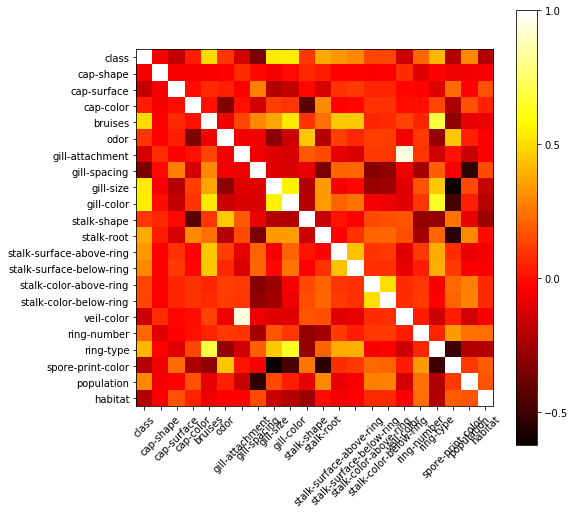

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(len(mushrooms.columns)), list(mushrooms.columns), rotation=45)
plt.yticks(np.arange(len(mushrooms.columns)), list(mushrooms.columns))
cax = ax.imshow(mushrooms.corr(), cmap='hot', interpolation='nearest')
cbar = fig.colorbar(cax, ticks=[-1, -0.5, 0, 0.5, 1])
plt.show()

Интересен е въпроса до колко са корелирани цветовете на различните цветове на частите от гъбите.

In [19]:
mushrooms[color_columns].corr()

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
cap-color,1.000000,0.097253,0.089248,0.093015,-0.001314,-0.233534
gill-color,0.097253,1.000000,-0.058458,-0.074540,-0.107792,-0.474733
stalk-color-above-ring,0.089248,-0.058458,1.000000,0.509303,0.079030,0.225851
stalk-color-below-ring,0.093015,-0.074540,0.509303,1.000000,0.077198,0.209170
veil-color,-0.001314,-0.107792,0.079030,0.077198,1.000000,0.036781
spore-print-color,-0.233534,-0.474733,0.225851,0.209170,0.036781,1.000000


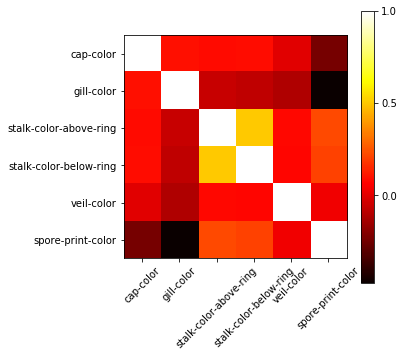

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
plt.xticks(np.arange(len(color_columns)), color_columns, rotation=45)
plt.yticks(np.arange(len(color_columns)), color_columns)
cax = ax.imshow(mushrooms[color_columns].corr(), cmap='hot', interpolation='nearest')
cbar = fig.colorbar(cax, ticks=[-1, -0.5, 0, 0.5, 1])
plt.show()

## Изследване на зависимости
### Зависимост между цветовете и отровността

Може би най-интересният въпрос е какви на цвят са отровните гъби. За целта ще покажем графично различния брой на отровни и неотровни гъби в зависимост от цветовете на различни техни части.

In [21]:
# Separate eatable and poisonous mushrooms in two sets 
eatable = mushrooms[mushrooms["class"]==1]
poisonous = mushrooms[mushrooms["class"]==-1]
print(len(eatable))
print(len(poisonous))

4208
3916


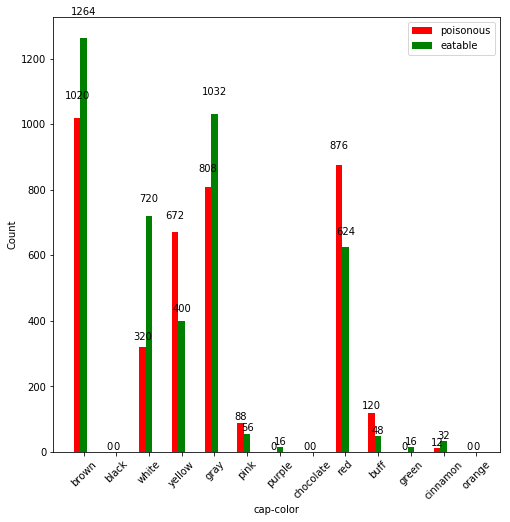

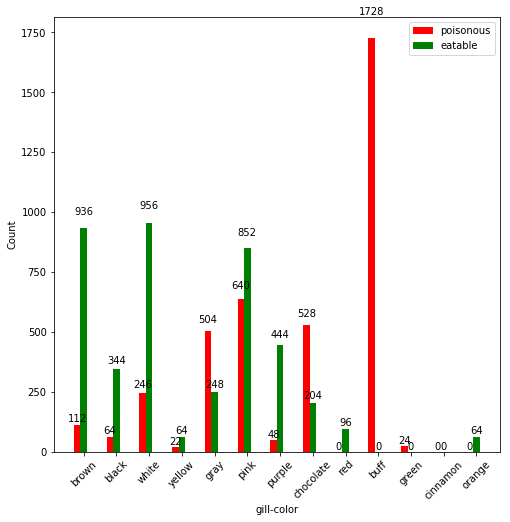

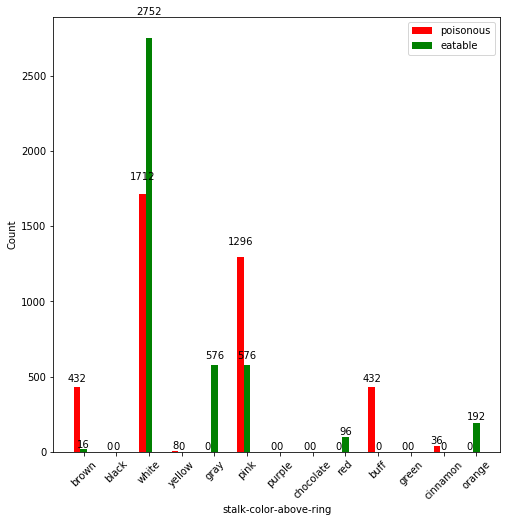

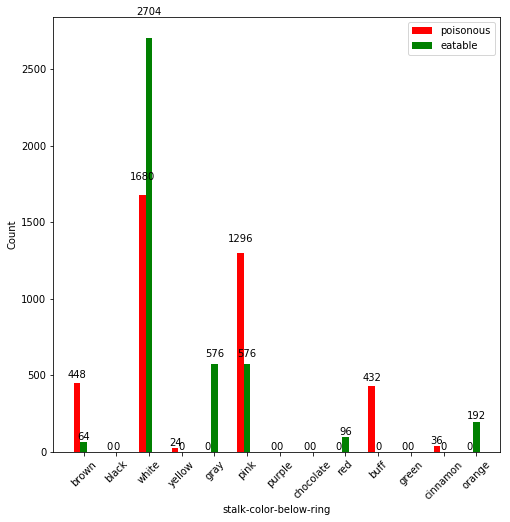

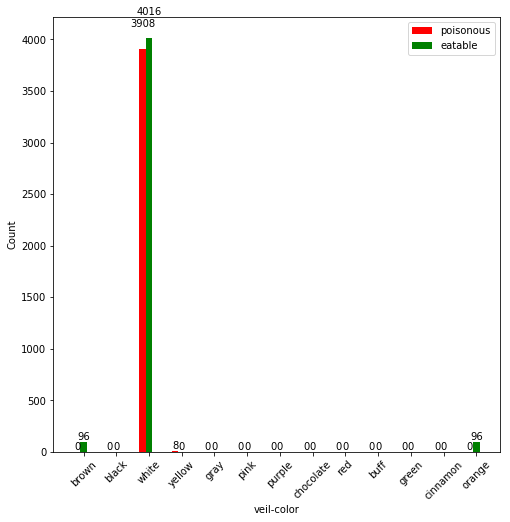

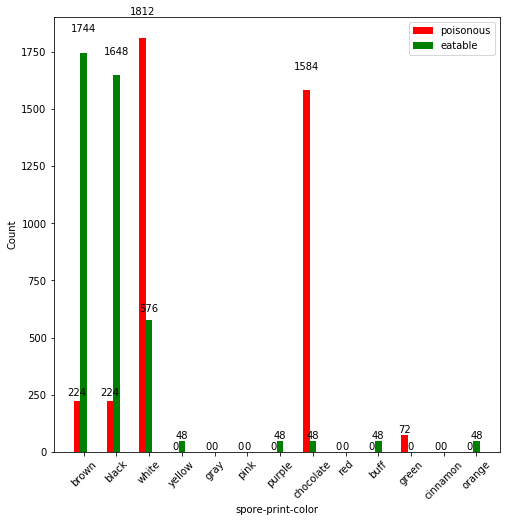

In [22]:
inversed_encoding = {encodedict[k]: k for k in encodedict}
color_names = dict()
color_names["b"] = "buff"
color_names["c"] = "cinnamon"
color_names["e"] = "red"
color_names["g"] = "gray"
color_names["h"] = "chocolate"
color_names["k"] = "black"
color_names["n"] = "brown"
color_names["o"] = "orange"
color_names["p"] = "pink"
color_names["r"] = "green"
color_names["u"] = "purple"
color_names["w"] = "white"
color_names["y"] = "yellow"
    
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


for field in color_columns:
    pvalues = []
    evalues = []
    cvalues = []
    for c in inversed_encoding:
        pvalues.append(len(poisonous[poisonous[field]==c]))
        evalues.append(len(eatable[eatable[field]==c]))
        cvalues.append(color_names[inversed_encoding[c]])

    N = len(pvalues)
    ind = np.arange(N)
    width = 0.2

    fig, ax = plt.subplots(figsize=(8,8))

    prects = ax.bar(ind, pvalues, width, color='r')
    erects = ax.bar(ind+width, evalues, width, color='g')

    plt.xticks(rotation=45)
    ax.set_ylabel('Count')
    ax.set_xlabel(field)
    ax.set_xticks(ind+width)
    ax.set_xticklabels(cvalues)
    ax.legend(('poisonous', 'eatable'))
    
    autolabel(prects)
    autolabel(erects)
    
    plt.show()


## Подготовка за класифициране

Подготвяме данните за изследване, като на случаен принцип избирае тренировъчно и тестово множество.

In [24]:
# Train Test Split

from sklearn.model_selection import train_test_split
X = mushrooms.drop('class', axis=1)
y = mushrooms['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Класификация

В тази точка се представят на кратко няколко типични примера за машинно самообучение и как те се справят със задачата.

In [26]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=30), 
          'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=1),
          'Linear SVM': SVC(kernel='rbf', gamma=.10, C=1.0)}

for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print(acc)
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)

Results for: Logistic Regression

[[1084   80]
 [  57 1217]]
             precision    recall  f1-score   support

         -1       0.95      0.93      0.94      1164
          1       0.94      0.96      0.95      1274

avg / total       0.94      0.94      0.94      2438

0.943806398687



Results for: Decision Tree

[[1164    0]
 [   0 1274]]
             precision    recall  f1-score   support

         -1       1.00      1.00      1.00      1164
          1       1.00      1.00      1.00      1274

avg / total       1.00      1.00      1.00      2438

1.0



Results for: Random Forest

[[1164    0]
 [   0 1274]]
             precision    recall  f1-score   support

         -1       1.00      1.00      1.00      1164
          1       1.00      1.00      1.00      1274

avg / total       1.00      1.00      1.00      2438

1.0



Results for: K-Nearest Neighbors

[[1163    1]
 [   2 1272]]
             precision    recall  f1-score   support

         -1       1.00      1.00     

## Анализ на feature-ите
### Ентропия в тренировъчното множество
За да придобием ориентъровъчна представа доколко варират различните характеристики, се прави оценка на ентрпоията.
Колкото по-ниска е тя, толкова по-предвидимо е от даден признак да се получи правилна хипотеза. 

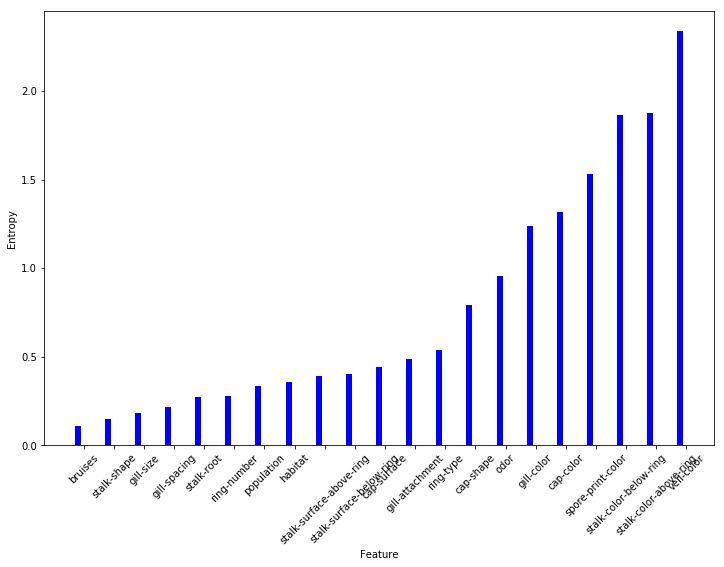

In [27]:
# Measure the entropy in the train set

def entropy(subset_counts):
    """
    Calculate entropy of subset_counts
    @author: skanev
    """
    
    subset_counts = np.array(subset_counts)
    subset_counts_normalized = subset_counts / subset_counts.sum()
    
    entropy = sum([-subset_count * np.log2(subset_count + 0.000000000001) 
                   for subset_count in subset_counts_normalized])
    
    entropy = np.round(entropy, 4)
    # print('Entropy for', subset_counts, 'is', entropy)
    return entropy


E = entropy(X_train.as_matrix())
ES = sorted([(v, E[k]) for k, v in enumerate(X_train)], key=lambda x: x[1])

N = len(ES)
ind = np.arange(N)
width = 0.2

fig, ax = plt.subplots(figsize=(12,8))

xvalues = [v[1] for v in ES]
yvalues = [v[0] for v in ES]

prects = ax.bar(ind, xvalues, width, color='b')

plt.xticks(rotation=45)
ax.set_ylabel('Entropy')
ax.set_xlabel("Feature")
ax.set_xticks(ind+width)
ax.set_xticklabels(yvalues)

plt.show()

### Приоритезация на характеристиките

Интересен въпрос е кои са по-основните характеристики, за които трябва да се гледа, когато се берат гъби.

За целта прилагаме реализацията на един алгоритмите за feature selection - Releif, т.е. целта е да подредим по някакъв начин различните характеристики, така че да видим кои от тях са по-важни и кои - не.

В основни линии, алгоритъмът, в няколко итерации, избира случаен екземпляр и търси най-близкия положителен и най-близкия негативен негов съсед. След това съставя метрика, като за положителния съсед я увеличава при съвпадение и намалява при разлика. Съответно при негативния - намалява при съвпадение и увеличава при разлика. 

Долу може да се види какво смята алгоритъма като важна характеристика за една гъба на база даденото обучаващо множество.

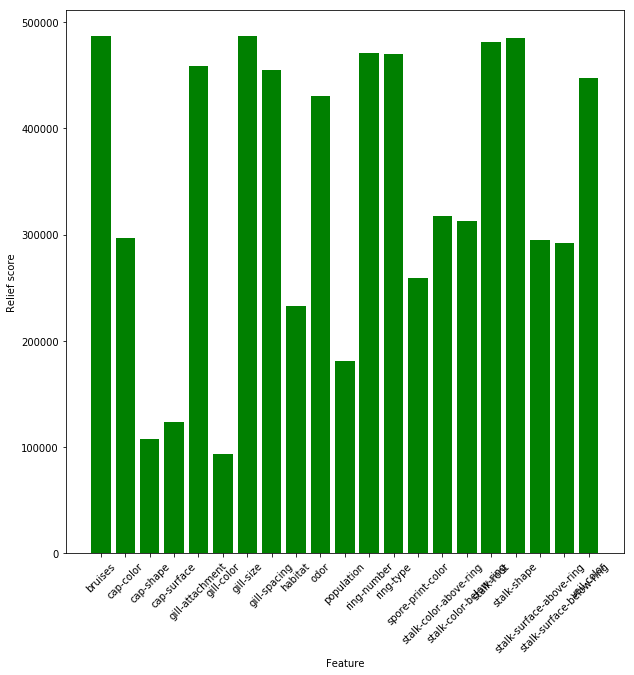

In [28]:
import relief
reliefF = relief.ReliefF()
reliefF.fit(X_train.as_matrix(), y_train.as_matrix())

plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Relief score")
columns = X_train.columns.tolist()
plt.bar(columns, reliefF.feature_scores, color='g')
plt.show()

Съответно искаме да видим колко хистограмата ще съвпада с тази на тестовото множество.

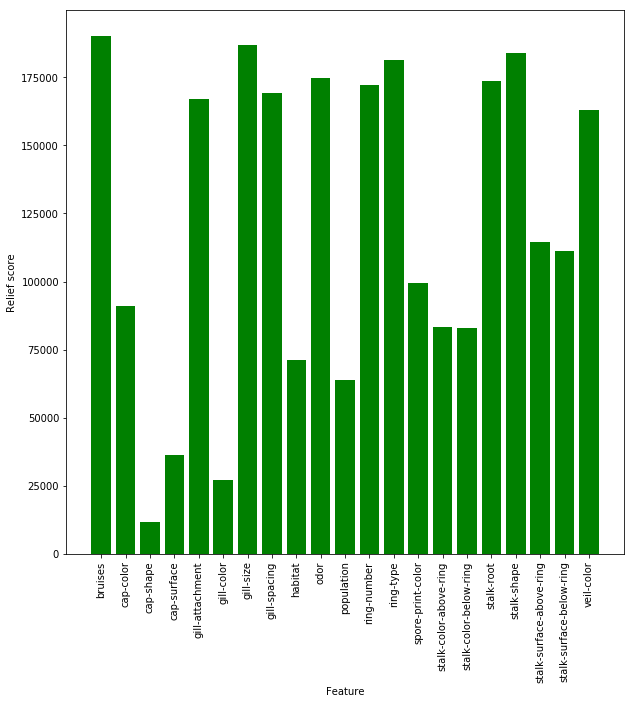

In [25]:
import relief
relief_test = relief.ReliefF()
relief_test.fit(X_test.as_matrix(), y_test.as_matrix())

plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Relief score")
plt.bar(columns, relief_test.feature_scores, color='g')
plt.show()

Интересно е да се види каква е корелацията между ентропията и получените оценки по-горе.

Понеже двете множества образуват различни числови интервали, първо ще ги нормализраме.
За целта ще използваме най-простия метод за това - с афинна операция :)
Това е scale.


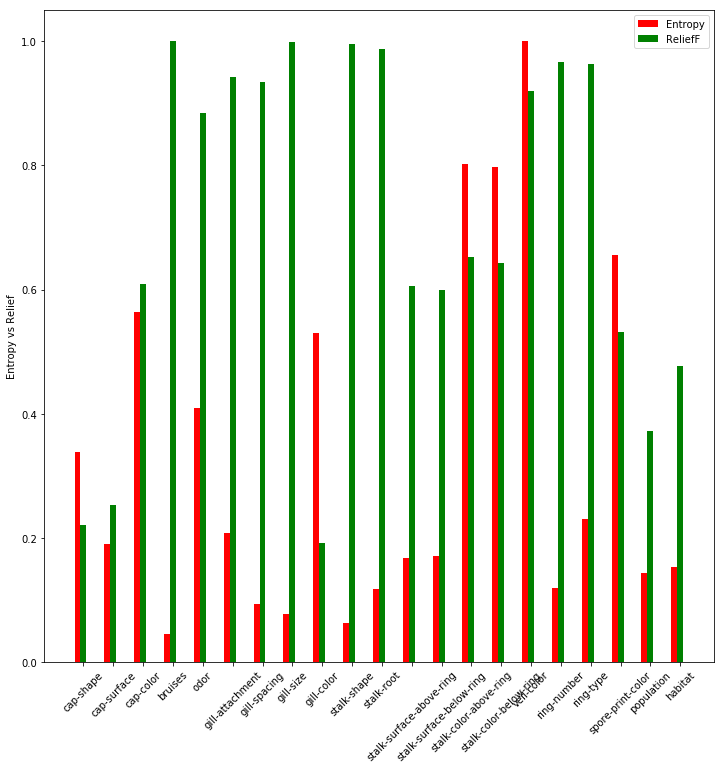

In [29]:
from sklearn.preprocessing import scale

combined = np.vstack((E / np.max(E), reliefF.feature_scores / np.max(reliefF.feature_scores))).T
scale(combined)

evalues = []
rvalues = []

for k, row in enumerate(combined):
    evalues.append(row[0])
    rvalues.append(row[1])

N = len(evalues)
ind = np.arange(N)
width = 0.2

fig, ax = plt.subplots(figsize=(12,12))


erects = ax.bar(ind, evalues, width, color='r')
rrects = ax.bar(ind+width, rvalues, width, color='g')

plt.xticks(rotation=45)
ax.set_ylabel('Entropy vs Relief')
ax.set_xticks(ind+width)
ax.set_xticklabels(list(X_train.columns))
ax.legend(('Entropy', 'ReliefF'))
    
plt.show()


Това което може да се направи като извод, е че Relief предпочита признаците, които имат по-малка ентропия, което реално му значи, че се насочва към признаците, които по-еднозначно определят класовете.

## Повторно класифициране

След като получихме някаква наредба на харектериситиките, можем да видим какво ще се получи, ако приложим същото нещо за редуцирано откъм параметри тренировъчно множество.

In [30]:
r_keys = []

for k in range(reliefF.n_features_to_keep):
    r_keys.append(columns[reliefF.top_features[k]])

X_train2 = X_train[r_keys]
X_train2.head()


X_test2 = X_test[r_keys]

In [33]:
keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=30), 
          'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=1),
          'Linear SVM': SVC(kernel='rbf', gamma=.10, C=1.0)}

for k,v in models.items():
    mod = v
    mod.fit(X_train2, y_train)
    pred = mod.predict(X_test2)
    print('Results for: ' + str(k) + '\n')
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    print(tn, fp, fn, tp)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print(acc)
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

Results for: Logistic Regression

965 199 48 1226
[[ 965  199]
 [  48 1226]]
             precision    recall  f1-score   support

         -1       0.95      0.83      0.89      1164
          1       0.86      0.96      0.91      1274

avg / total       0.90      0.90      0.90      2438

0.898687448728



Results for: Decision Tree

1164 0 9 1265
[[1164    0]
 [   9 1265]]
             precision    recall  f1-score   support

         -1       0.99      1.00      1.00      1164
          1       1.00      0.99      1.00      1274

avg / total       1.00      1.00      1.00      2438

0.996308449549



Results for: Random Forest

1164 0 9 1265
[[1164    0]
 [   9 1265]]
             precision    recall  f1-score   support

         -1       0.99      1.00      1.00      1164
          1       1.00      0.99      1.00      1274

avg / total       1.00      1.00      1.00      2438

0.996308449549



Results for: K-Nearest Neighbors

1135 29 0 1274
[[1135   29]
 [   0 1274]]
          

## Извод от финалните резултати

Изводът, който можем да направим, е че успяваме да направим така, че алгоритмите да работят почти без грешка, като работят само с по-малко от половината от данните, които са дадени първоначално.

За разгледаните класификатори, вече има много голямо значение, дали дават false positive или false negative.
* Първото съвпада със случая, че ни се препоръчва да ядем гъба, която е отровна. Това не искаме да ни се случва (!)
* Второто съвпада със случая, че ни казват да не ядем гъба, която не е отровна, понеже се съмняваме за нея. Това реално прави и всеки опитен гъбар и искаме да ни се случва.

Класификаторите, които в случая правят второто нещо са Decision Tree, Random Forest и Linear SVM.
За съжаление kNN се представя лошо и в двата случая, като съответно дава да ядем отровни гъби (в единя случай само веднъж, във втория цели 29 пъти).

По този начин стигаме до извода, че в production бихме искали да пуснем Relief с един от трите класификатора по-горе :)

Друга стратегия е да се ползват други техники за feature selection, но това - в друго домашно :)